# Teacher Salary Analysis

In [1]:
import numpy as np
import pandas as pd
from src.wrangle import read_and_filter_data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

## Acquire + Prepare

In [2]:
df = read_and_filter_data()

c:\Users\chris\OneDrive\Desktop\Anias\Teacher_Payroll_Analysis\src\wrangle.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465868 entries, 51877 to 519170
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Fiscal Year                        465868 non-null  int64         
 1   Hire Date                          465868 non-null  datetime64[ns]
 2   Hire Year                          465868 non-null  int32         
 3   Years of Employment                465868 non-null  Int16         
 4   FirstMidLastStart                  465868 non-null  object        
 5   Salary                             465868 non-null  float64       
 6   Total Other Pay                    465868 non-null  float64       
 7   Total Paid                         465868 non-null  float64       
 8   Employment Category                465868 non-null  category      
 9   Salary Category                    465868 non-null  category      
 10  Total Paid Category  

In [4]:
df.head(2).T

,51877,51878
Fiscal Year,2015,2015
Hire Date,2015-03-18 00:00:00,2003-09-02 00:00:00
Hire Year,2015,2003
Years of Employment,0,12
FirstMidLastStart,AngelaNoneLewis2015-03-18,GraceYGeng2003-09-02
Salary,49908.0,82900.0
Total Other Pay,0.0,0.0
Total Paid,14104.48,82215.35
Employment Category,0-5,11-15
Salary Category,40k-60k,80k-100k


In [5]:
df.tail(2).T

,519169,519170
Fiscal Year,2023,2023
Hire Date,2013-09-03 00:00:00,1997-10-07 00:00:00
Hire Year,2013,1997
Years of Employment,10,26
FirstMidLastStart,JohnRGeyer2013-09-03,MichelleAZytko Morgan1997-10-07
Salary,104969.0,128657.0
Total Other Pay,1540.4,-3527.68
Total Paid,104634.44,101899.62
Employment Category,6-10,26-30
Salary Category,100k-120k,120k-140k


In [6]:
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,465868.0,2019.0,2015.0,2017.0,2019.0,2021.0,2023.0,3.0
Hire Date,465868,2005-06-10 17:47:22.394841600,1980-02-01 00:00:00,1999-09-07 00:00:00,2004-12-01 00:00:00,2013-09-03 00:00:00,2023-06-14 00:00:00,NaN
Hire Year,465868.0,2005.0,1980.0,1999.0,2004.0,2013.0,2023.0,9.0
Years of Employment,465868.0,14.0,0.0,7.0,14.0,20.0,43.0,8.0
Salary,465868.0,91674.0,42306.0,77147.0,92087.0,105142.0,148657.0,19359.0
Total Other Pay,465868.0,2032.0,-64036.0,0.0,0.0,2613.0,94467.0,4032.0
Total Paid,465868.0,90866.0,360.0,74672.0,90225.0,107847.0,448270.0,23267.0
Salary Delta,465868.0,5.0,-45.0,2.0,5.0,7.0,106.0,6.0
Total Paid Delta,465868.0,8.0,-99.0,1.0,4.0,9.0,11404.0,28.0
Salary Monetary Diff,465868.0,4238.0,-56610.0,2026.0,3612.0,5744.0,58176.0,4667.0


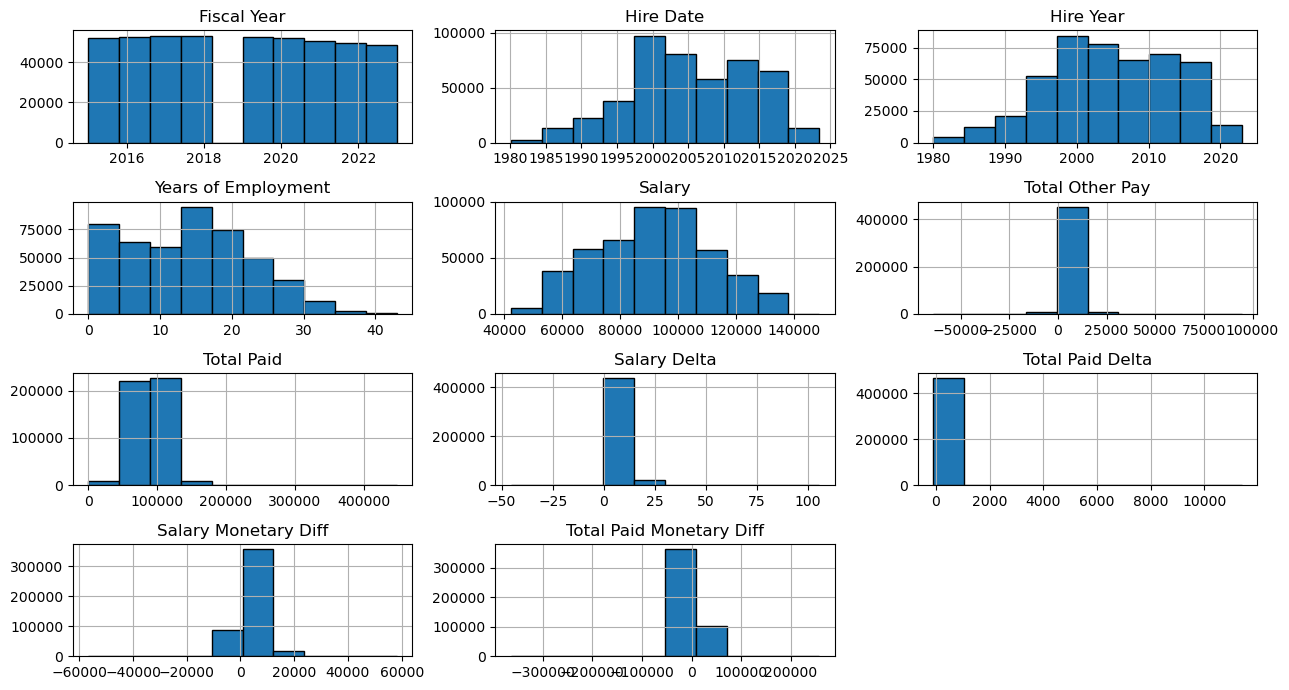

In [7]:
df.hist(figsize=(13,7), ec='black')
plt.tight_layout();

## Exploratory Data Analysis

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


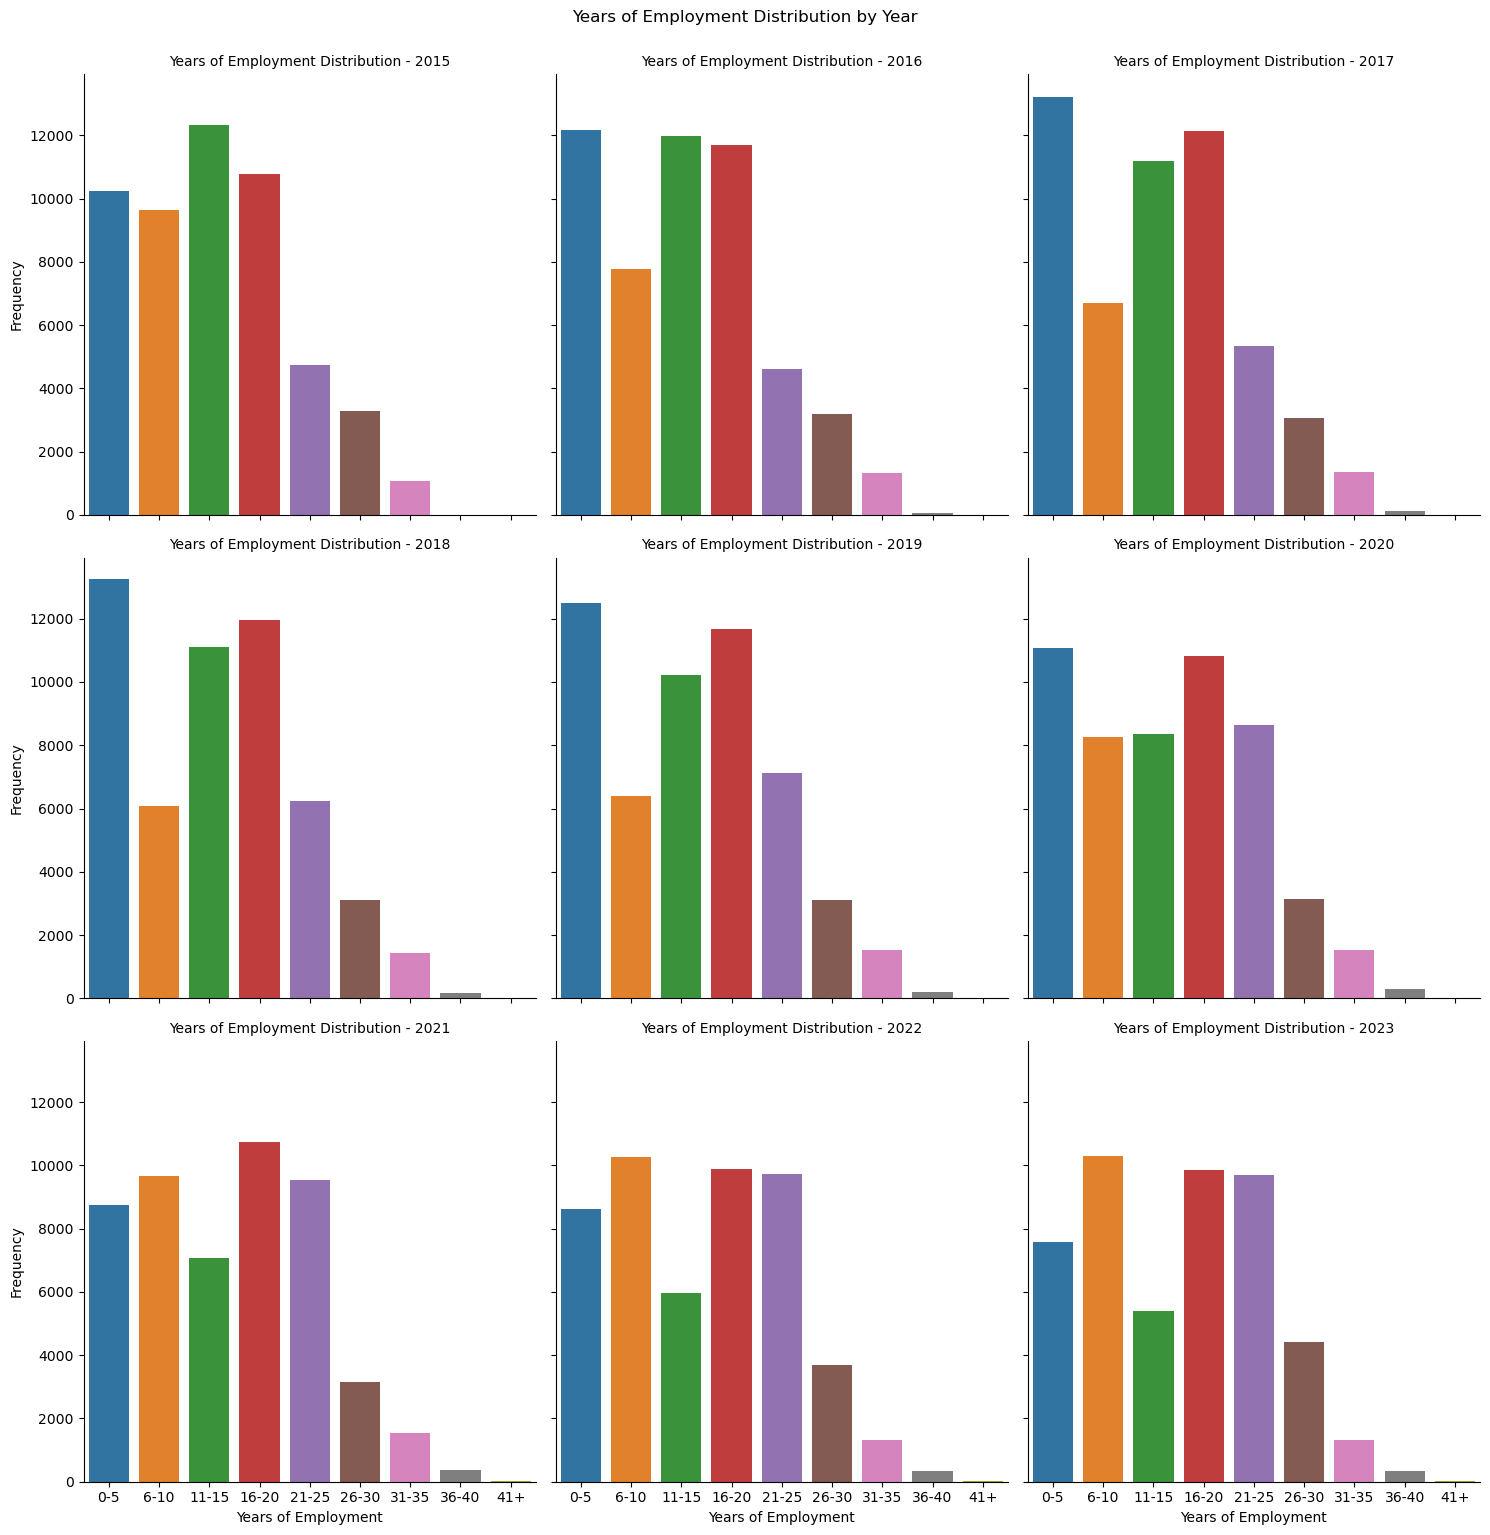

In [8]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Employment Category', col='Fiscal Year', kind='count',
                col_wrap=3,order=df['Employment Category'].value_counts().sort_index().index)
g.set_titles("Years of Employment Distribution - {col_name}")
g.set_axis_labels('Years of Employment', 'Frequency')
g.fig.suptitle('Years of Employment Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


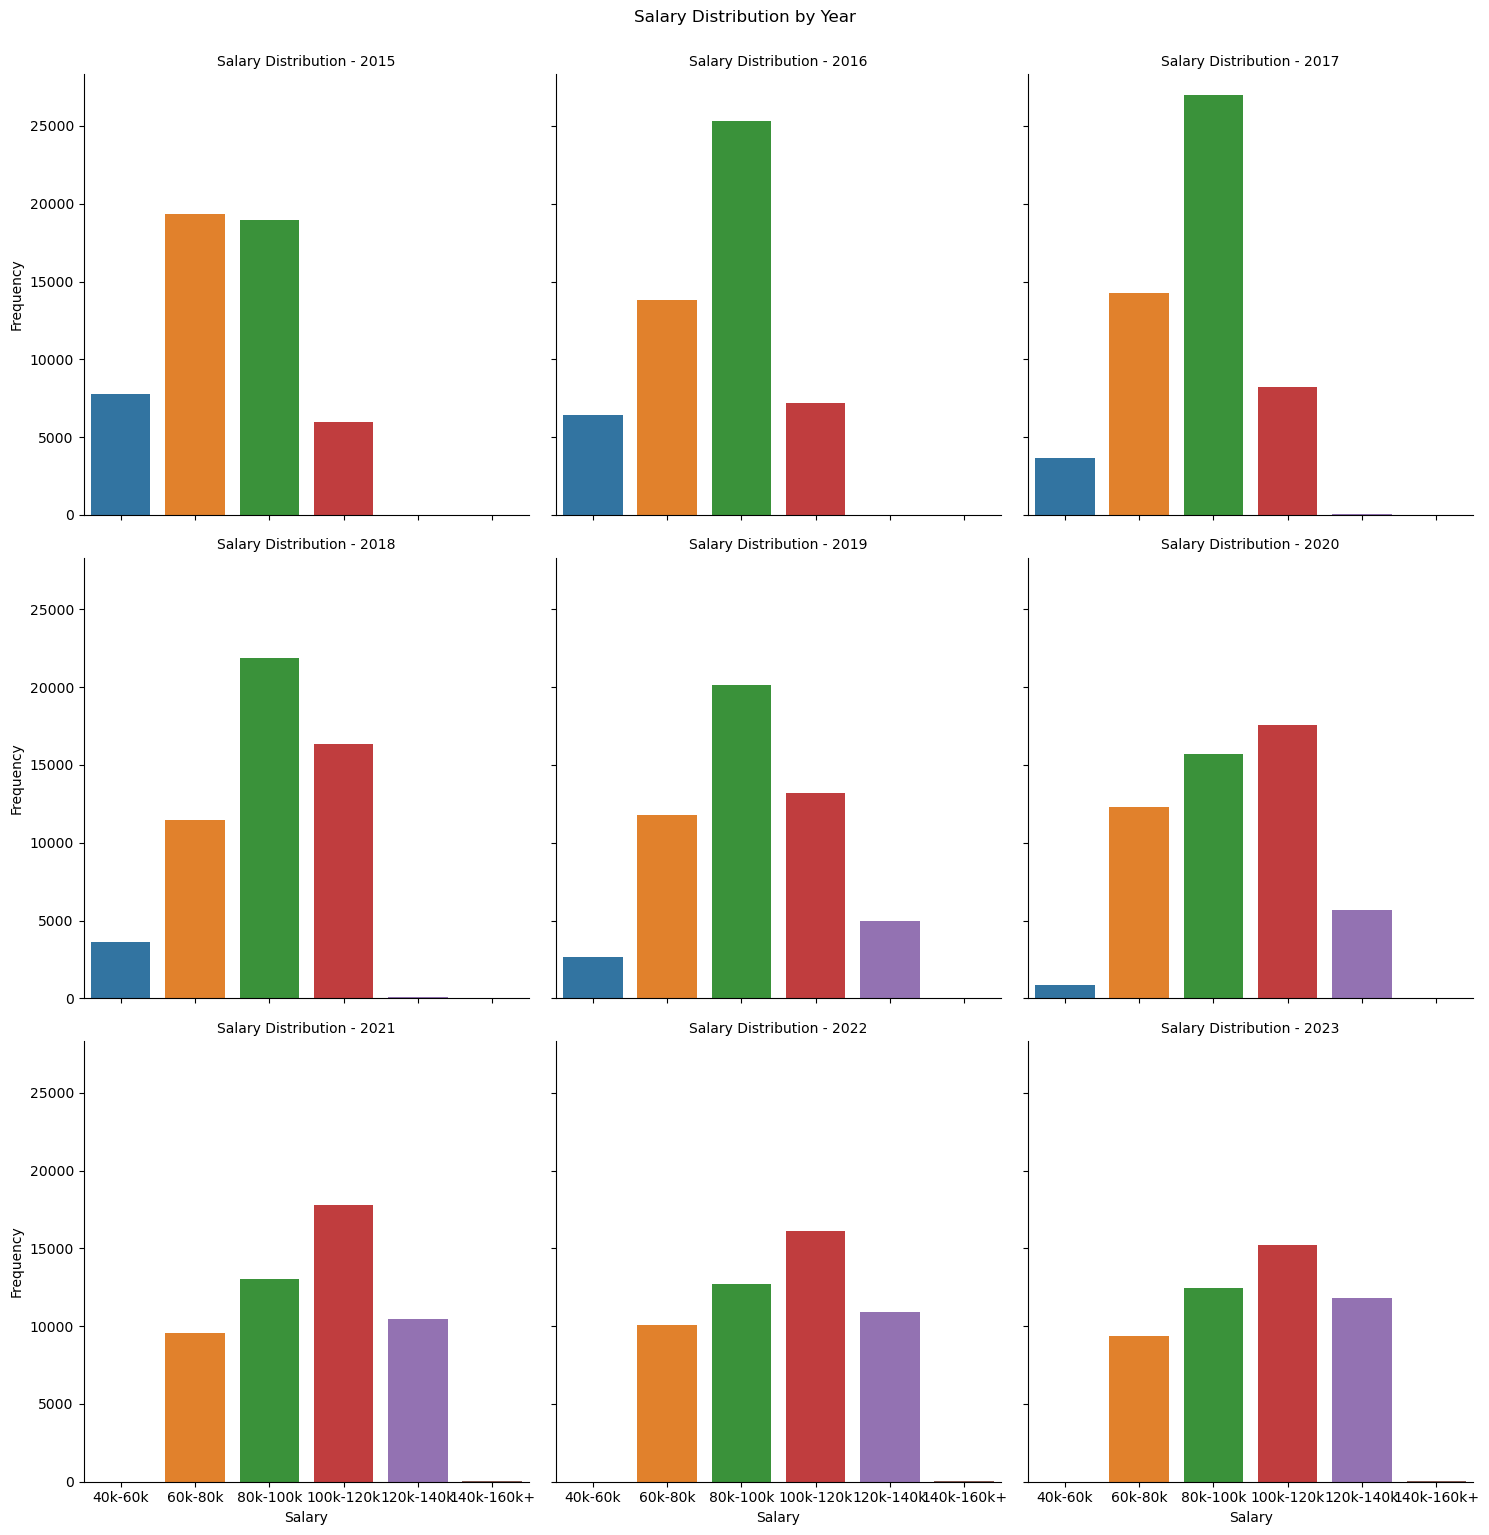

In [9]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Salary Category', col='Fiscal Year', kind='count',
                col_wrap=3, order=df['Salary Category'].value_counts().sort_index().index)
g.set_titles("Salary Distribution - {col_name}")
g.set_axis_labels('Salary', 'Frequency')
g.fig.suptitle('Salary Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


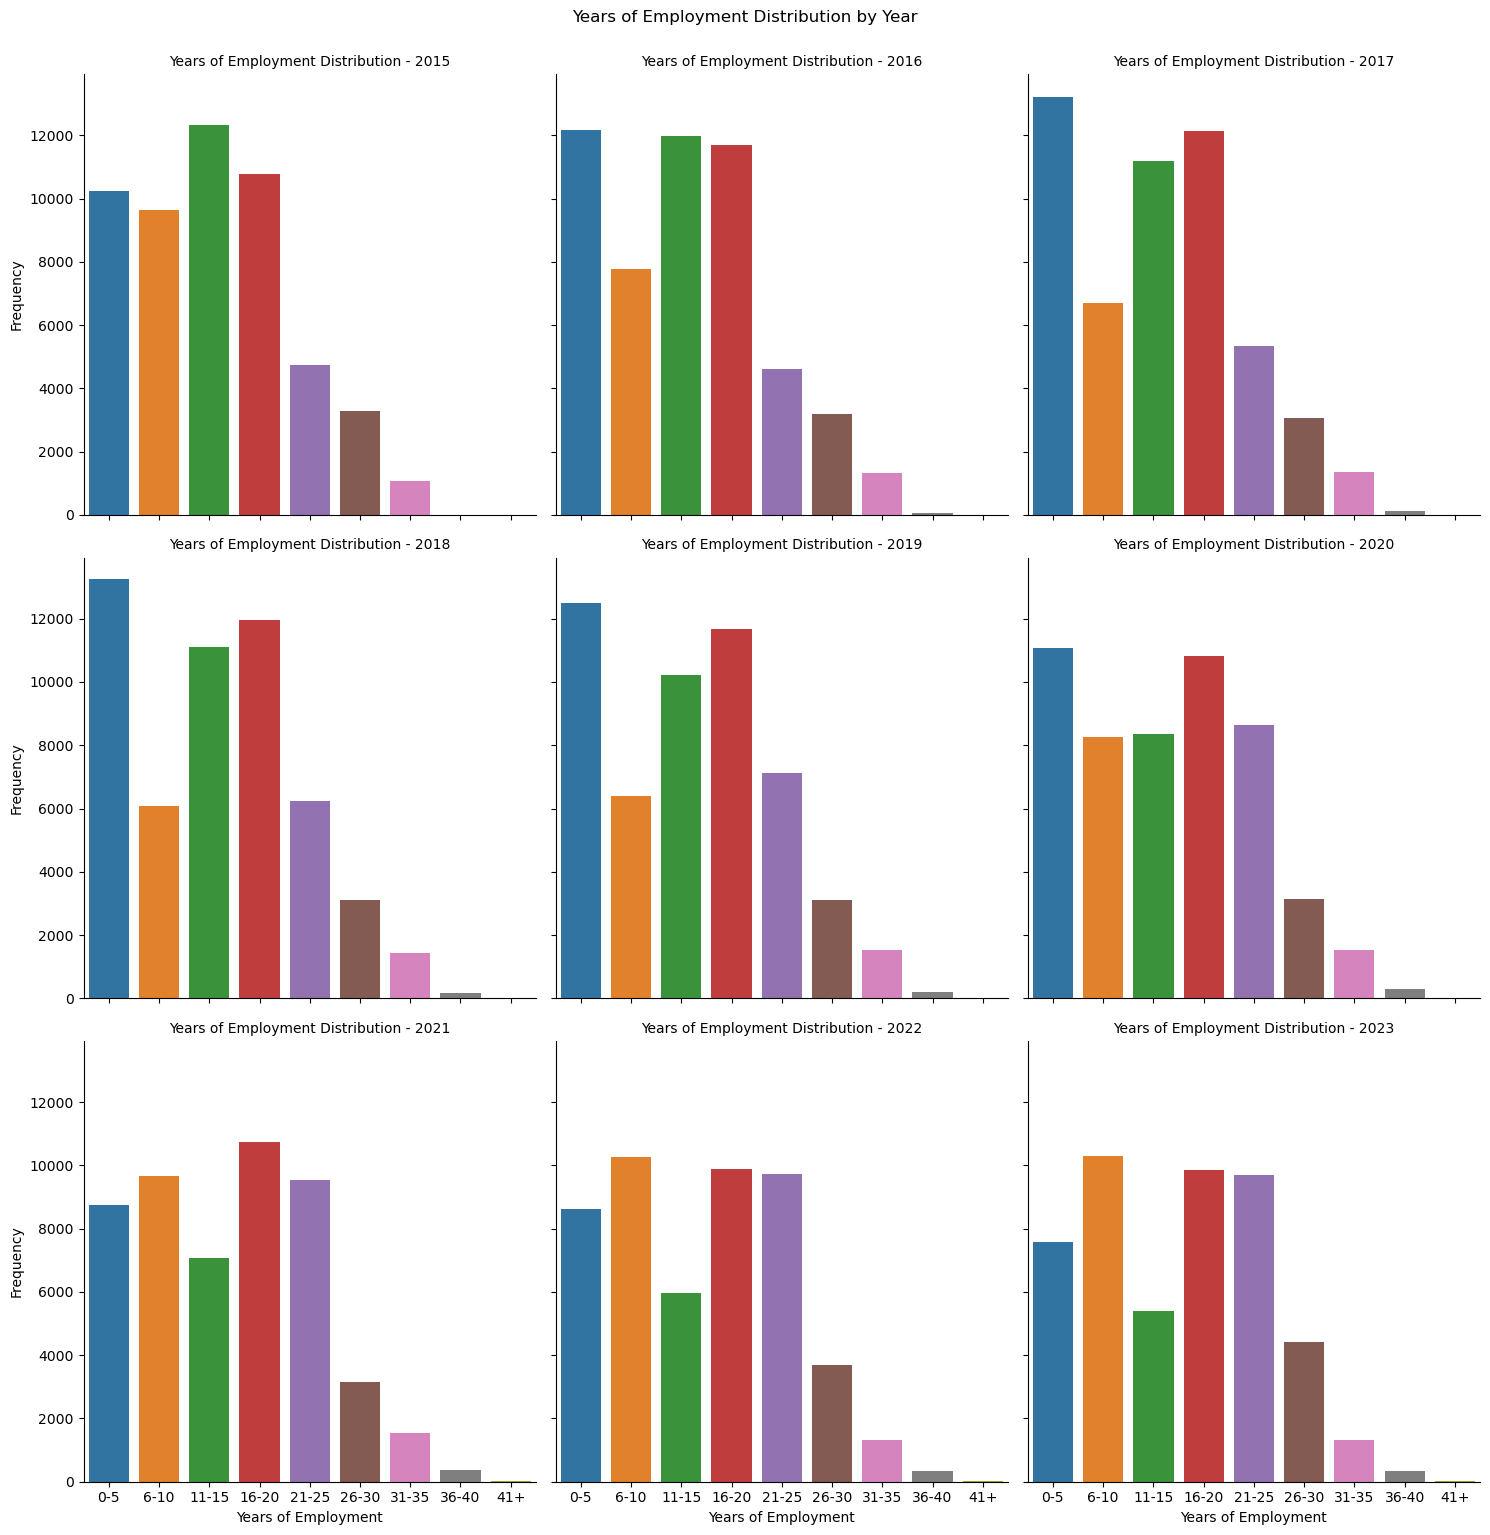

In [10]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Employment Category', col='Fiscal Year', kind='count',
                col_wrap=3,order=df['Employment Category'].value_counts().sort_index().index)
g.set_titles("Years of Employment Distribution - {col_name}")
g.set_axis_labels('Years of Employment', 'Frequency')
g.fig.suptitle('Years of Employment Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


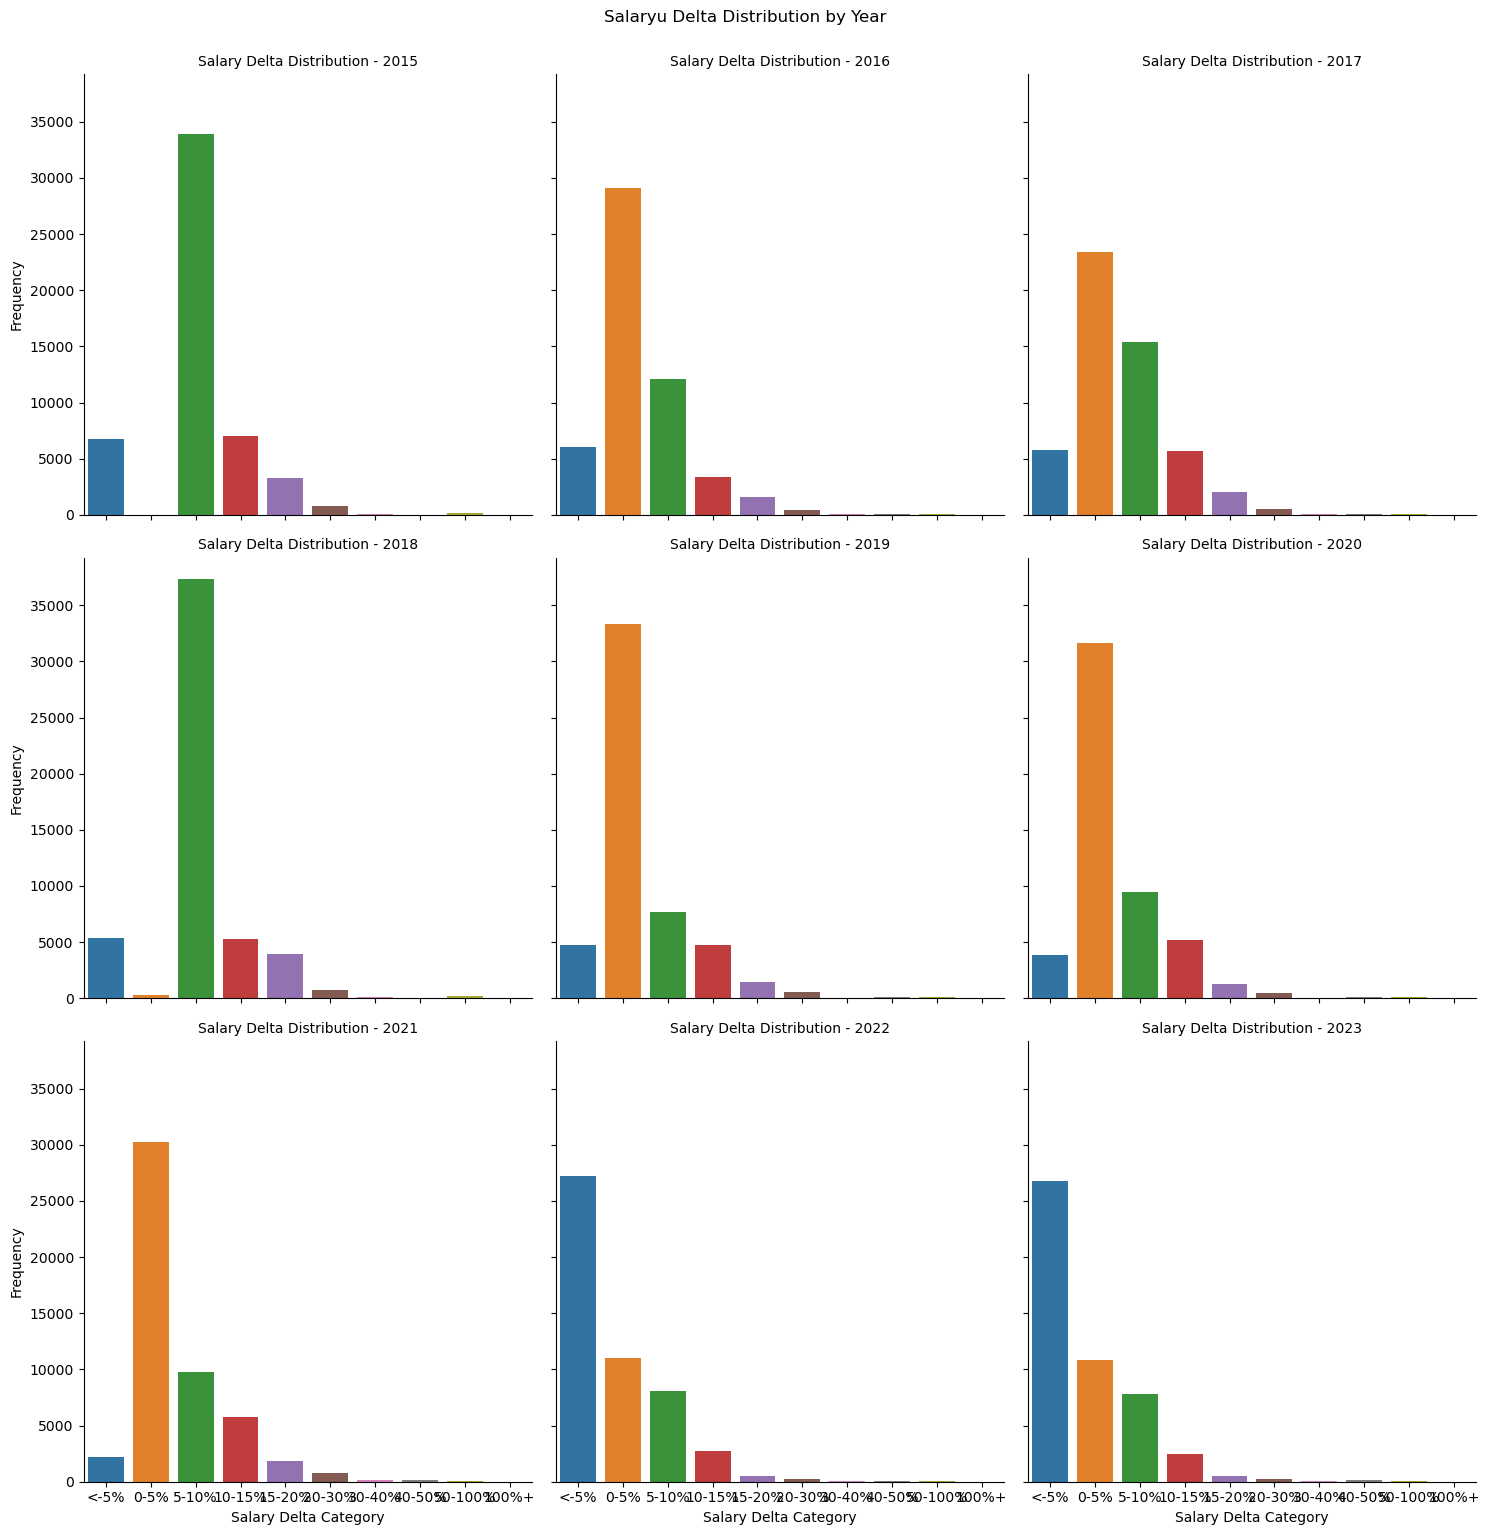

In [11]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Salary Delta Category', col='Fiscal Year', kind='count',
                col_wrap=3, order=df['Salary Delta Category'].value_counts().sort_index().index)
g.set_titles("Salary Delta Distribution - {col_name}")
g.set_axis_labels('Salary Delta Category', 'Frequency')
g.fig.suptitle('Salaryu Delta Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


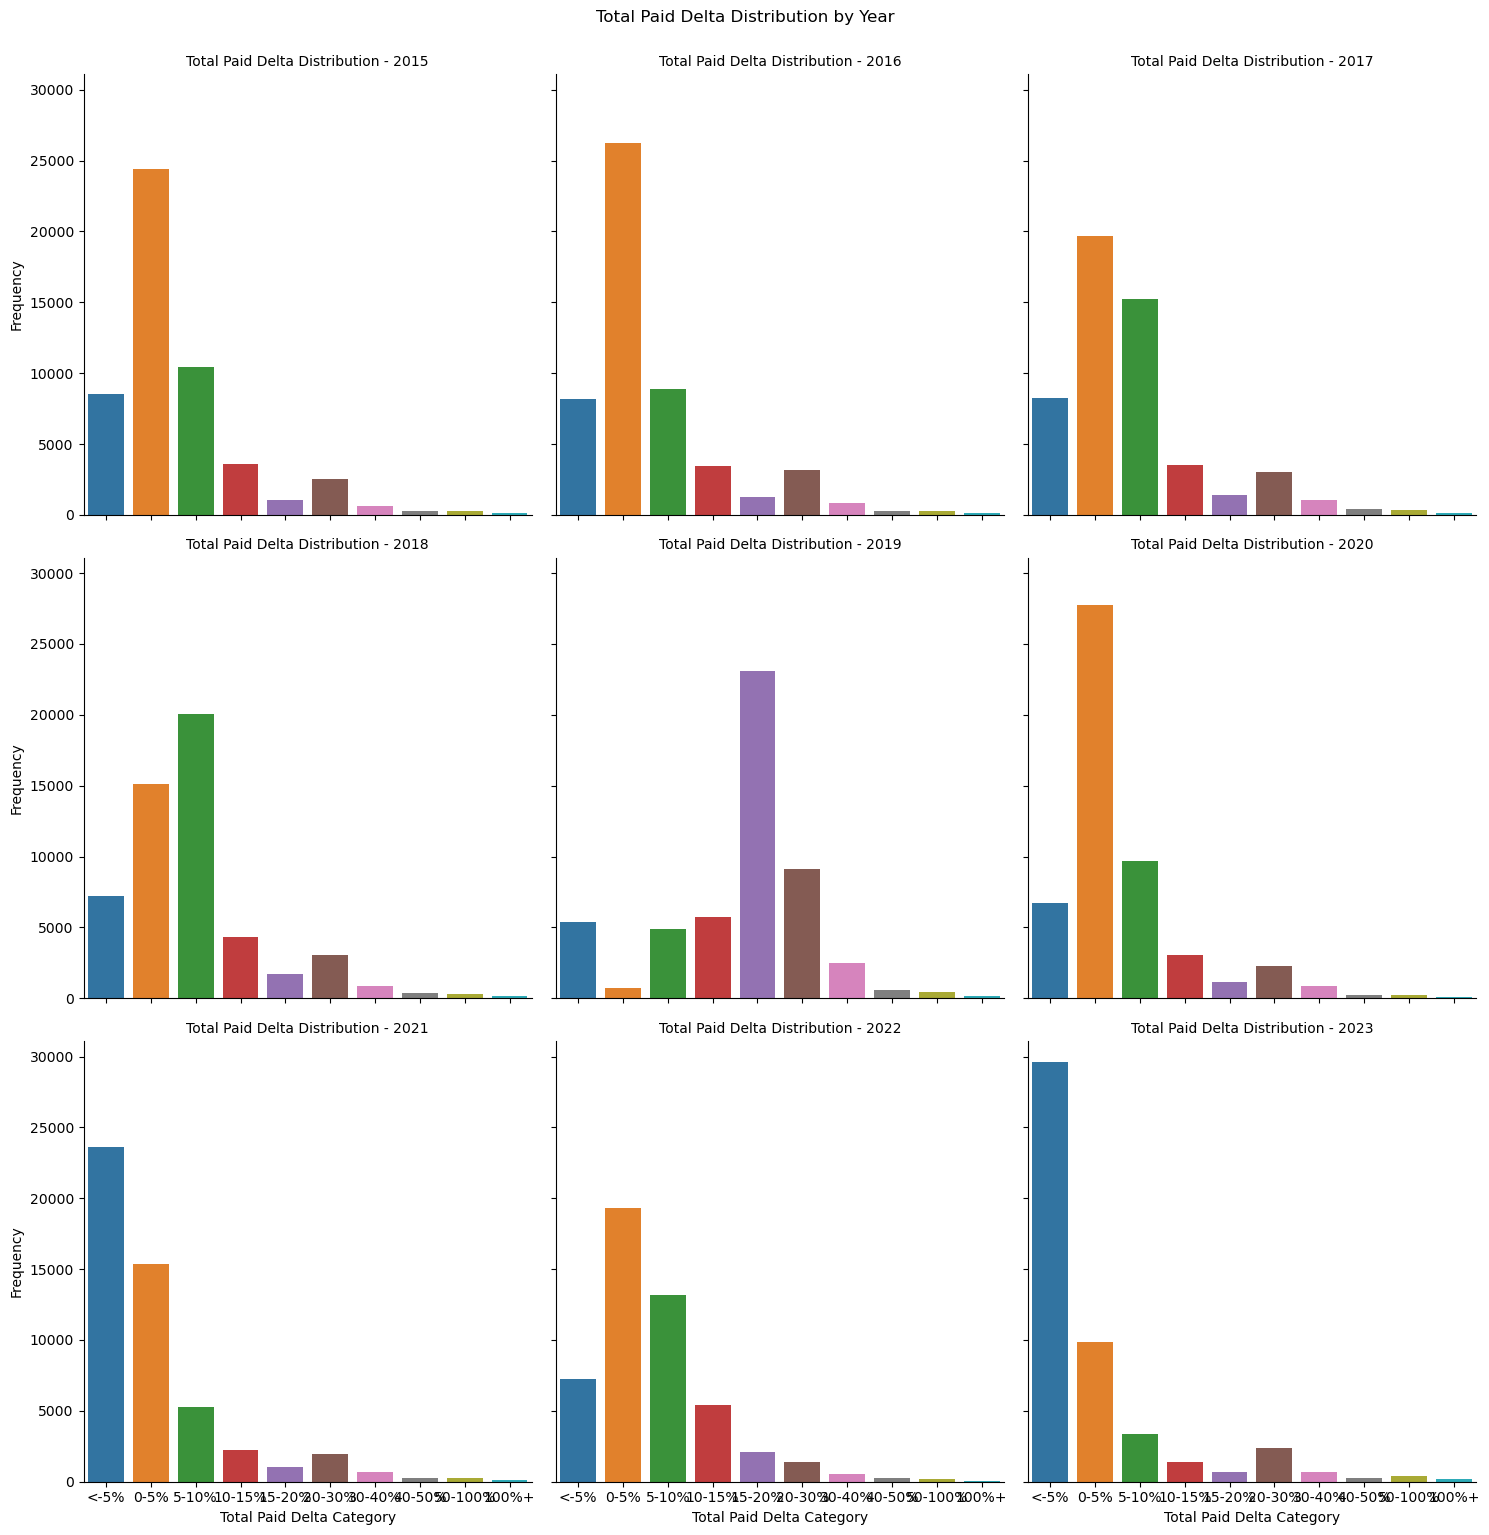

In [12]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Total Paid Delta Category', col='Fiscal Year', kind='count',
                col_wrap=3,order=df['Total Paid Delta Category'].value_counts().sort_index().index)
g.set_titles("Total Paid Delta Distribution - {col_name}")
g.set_axis_labels('Total Paid Delta Category', 'Frequency')
g.fig.suptitle('Total Paid Delta Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

In [13]:
df.groupby(by=['Years of Employment'])['Salary'].agg(['min','median','max'])

,min,median,max
Years of Employment,,,
0,49908.0,61070.0,96189.0
1,49136.0,60704.0,109316.0
2,49908.0,62284.0,111103.0
3,49908.0,66200.0,113381.0
4,49908.0,69716.0,136449.0
5,49908.0,72076.0,126109.0
6,49908.0,76887.0,130511.0
7,49908.0,81358.0,117469.0
8,44076.0,87272.0,126323.0


In [14]:
df[df['Fiscal Year']==2023].groupby(by=['Employment Category'])['Total Other Pay'].agg(['min','median','max'])

,min,median,max
Employment Category,,,
0-5,-14557.25,928.80,31600.69
6-10,-16366.16,565.76,94466.93
11-15,-23579.34,611.14,65517.93
16-20,-28871.16,520.38,51331.61
21-25,-28006.16,475.00,44672.58
26-30,-42391.10,475.00,72483.48
31-35,-24186.82,475.00,44672.58
36-40,-10791.96,475.00,23989.95
41+,-1669.28,475.00,23181.35


In [15]:
df[df['Fiscal Year']==2023].describe().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,48950.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,0.0
Hire Date,48950,2008-03-20 11:31:17.295199232,1980-06-26 00:00:00,2001-04-07 18:00:00,2007-08-30 00:00:00,2015-09-08 00:00:00,2023-06-14 00:00:00,NaN
Hire Year,48950.0,2007.612094,1980.0,2001.0,2007.0,2015.0,2023.0,8.70047
Years of Employment,48950.0,15.387906,0.0,8.0,16.0,22.0,43.0,8.70047
Salary,48950.0,100857.103739,49385.0,88937.0,102273.0,114845.0,148657.0,19750.448503
Total Other Pay,48950.0,1561.192725,-42391.1,475.0,520.38,1475.0,94466.93,3831.988949
Total Paid,48950.0,99835.437314,2883.86,84750.04,102551.36,116600.3375,208491.92,22294.499259
Salary Delta,48950.0,2.660905,-40.59,0.0,0.0,4.42,83.24,5.943048
Total Paid Delta,48950.0,2.968318,-92.73,-3.8,-0.48,3.01,2189.26,28.647059
Salary Monetary Diff,48950.0,2296.053933,-52730.0,0.0,0.0,3972.0,57367.0,5151.422269
